In [1]:
import re
import string
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

1. Escolha 10 documentos da base, e determine seu documento mais parecido (que não pode ser ele mesmo), usando:
a) Representação vetorial CountVectorizer com similaridade do cosseno;
b) Representação vetorial TF-IDF com similaridade do cosseno.

In [2]:
df = pd.read_csv('dataset/hacker_news_sample.csv')
df = df.dropna(subset=['text'])
# remove html symbols
df['text'] = df['text'].apply(lambda row: re.sub('\<[^>]*\>', ' ', row))
df['text'] = df['text'].apply(lambda row: re.sub('\&[^;]*\;', ' ', row))

vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()
all_texts = vectorizer.fit_transform(df['text'][:1000])
selected_texts = all_texts[:10]

for j in range(selected_texts.shape[0]):
    temp = 1
    aux = None
    for i in range(all_texts.shape[0]):
        d = distance.cosine(all_texts.toarray()[i].tolist(), selected_texts.toarray()[j].tolist())
        
        if d < temp and df['text'].iloc[j] != df['text'].iloc[i] and d != 0:
            temp = d
            aux = i
    print('text '+str(temp))
    print(df['text'].iloc[j])
    print('\nmost similar text')
    print(df['text'].iloc[aux]+'\n\n')


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


text 0.7373449731811579
  which leads me to say why are you using C to do X?  Because they know C it s fast and it has lots of libs available. They might also dislike Java or CL. Not every engineering decision is perfect lots of factors play in.   Attempts to combine the best of C (speed) with the best of scripting languages (easy to do things fast without having to pay attention to what you are doing) in my opinion end up merely joining the worst of both worlds rather than the best of both worlds.  The  pay attention  things is to needless complexity (memory management etc). They only reason we put up with those things was to get speed. If we can get adequate speed without those nobody cares about them.   Besides isn t programming about being specific? Do you really want to code stuff without having to worry about the details?  No programming is about getting results. Nobody cares about the details in the level of programming language minutuae. We care about the  effort put in  and  q

2. Elabore um problema de classificação binária de textos coerente com sua base.
a) Determine o rótulo dos documentos (separando os documentos em classes bem definidas).

In [3]:
data = df[['text', 'type']][:10000]
# comment -> 0
# story -> 1

y = [0 if i == 'comment' else 1 for i in data['type']]

b) Extraia as representações vetoriais com CountVectorizer e TF-IDF.

In [4]:
count_vectorizer = CountVectorizer()
tfid_vectorizer = TfidfVectorizer()
x_count_vectorizer = count_vectorizer.fit_transform(data['text'])
x_tfid_vectorizer = tfid_vectorizer.fit_transform(data['text'])

c) Treine um classificador baseado em cada uma das duas representações vetoriais e Regressão Logística usando validação cruzada com 70% das amostras selecionadas para treino e 30% para teste. Exiba as matrizes de confusão, métricas de acurácia, precisão, recall e F1 score.

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


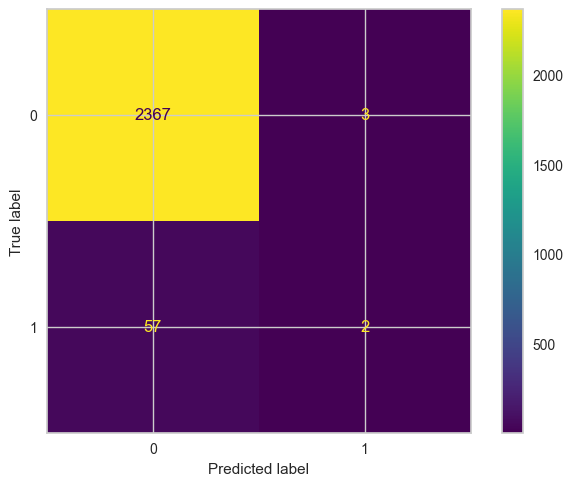

In [5]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(x_count_vectorizer, y, test_size=0.3)
X_train_tfid, X_test_tfid, y_train_tfid, y_test_tfid = train_test_split(x_tfid_vectorizer, y, test_size=0.3)

model = LogisticRegression().fit(X_train_count.toarray(), y_train_count)
pred = model.predict(X_test_count.toarray())

plot_confusion_matrix(model, X_test_count.toarray(), y_test_count)
plt.show()

In [6]:
print('F1 score '+str(f1_score(y_test_count, pred)))
print('recall '+str(recall_score(y_test_count, pred)))
print('precisao '+str(precision_score(y_test_count, pred)))
print('acuracia '+str(accuracy_score(y_test_count, pred)))

F1 score 0.0625
recall 0.03389830508474576
precisao 0.4
acuracia 0.975298476739399


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


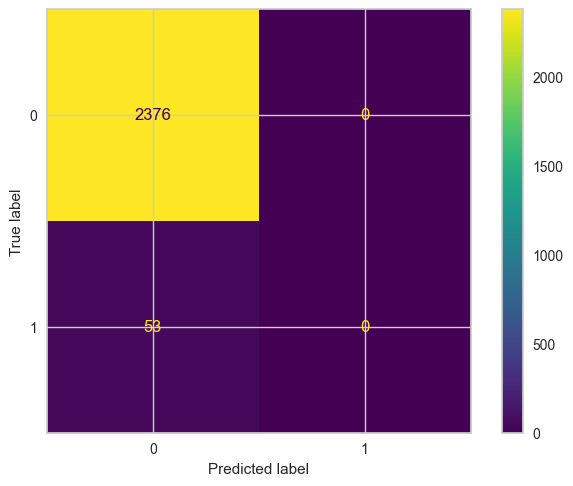

In [7]:
model = LogisticRegression().fit(X_train_tfid.toarray(), y_train_tfid)
pred = model.predict(X_test_tfid.toarray())

plot_confusion_matrix(model, X_test_tfid.toarray(), y_test_tfid)
plt.show()

In [8]:
print('F1 score '+str(f1_score(y_test_tfid, pred)))
print('recall '+str(recall_score(y_test_tfid, pred)))
print('precisao '+str(precision_score(y_test_tfid, pred)))
print('acuracia '+str(accuracy_score(y_test_tfid, pred)))

F1 score 0.0
recall 0.0
precisao 0.0
acuracia 0.9781803211198024


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


d) Faça o mesmo para o classificador Naive-Bayes.

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


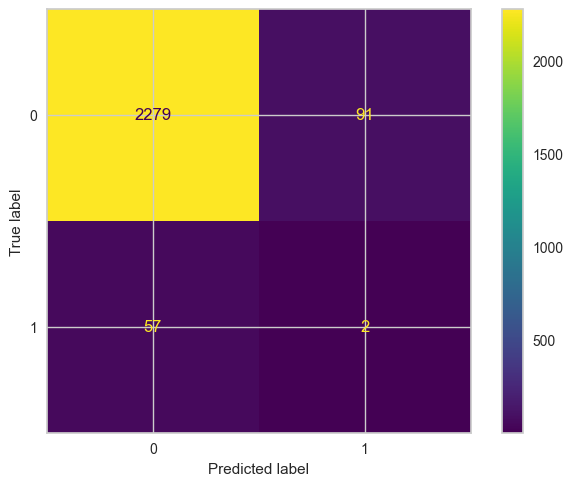

In [9]:
model = GaussianNB().fit(X_train_count.toarray(), y_train_count)
pred = model.predict(X_test_count.toarray())

plot_confusion_matrix(model, X_test_count.toarray(), y_test_count)
plt.show()

In [10]:
print('F1 score '+str(f1_score(y_test_count, pred)))
print('recall '+str(recall_score(y_test_count, pred)))
print('precisao '+str(precision_score(y_test_count, pred)))
print('acuracia '+str(accuracy_score(y_test_count, pred)))

F1 score 0.026315789473684213
recall 0.03389830508474576
precisao 0.021505376344086023
acuracia 0.939069575957184


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


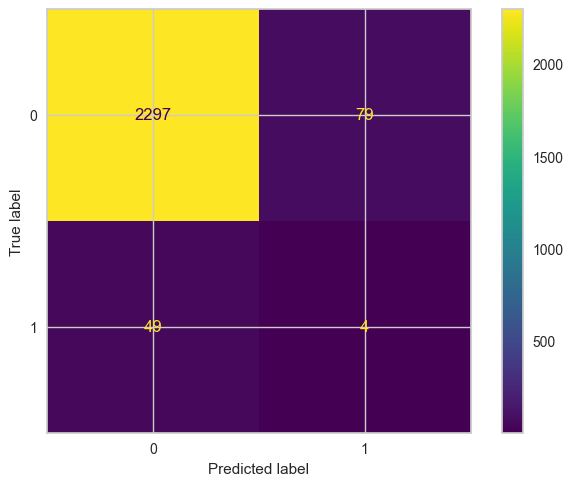

In [11]:
model = GaussianNB().fit(X_train_tfid.toarray(), y_train_tfid)
pred = model.predict(X_test_tfid.toarray())

plot_confusion_matrix(model, X_test_tfid.toarray(), y_test_tfid)
plt.show()

In [12]:
print('F1 score '+str(f1_score(y_test_tfid, pred)))
print('recall '+str(recall_score(y_test_tfid, pred)))
print('precisao '+str(precision_score(y_test_tfid, pred)))
print('acuracia '+str(accuracy_score(y_test_tfid, pred)))

F1 score 0.058823529411764705
recall 0.07547169811320754
precisao 0.04819277108433735
acuracia 0.9473034170440511


e) Faça o mesmo para um outro classificador de sua preferencia (pesquise na biblioteca Scikit-learn).

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


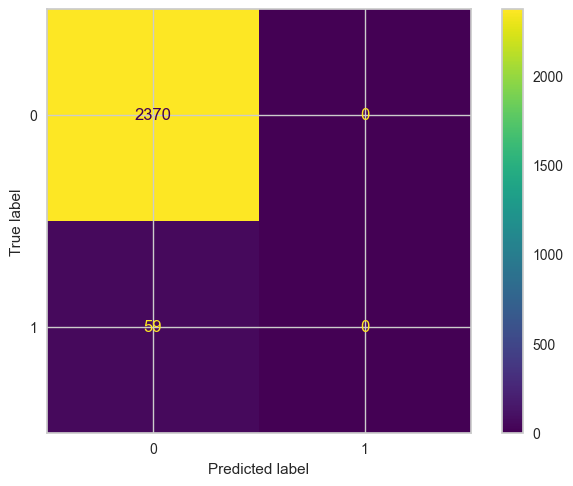

In [13]:
model = svm.SVC().fit(X_train_count.toarray(), y_train_count)
pred = model.predict(X_test_count.toarray())

plot_confusion_matrix(model, X_test_count.toarray(), y_test_count)
plt.show()

In [14]:
print('F1 score '+str(f1_score(y_test_count, pred)))
print('recall '+str(recall_score(y_test_count, pred)))
print('precisao '+str(precision_score(y_test_count, pred)))
print('acuracia '+str(accuracy_score(y_test_count, pred)))

F1 score 0.0
recall 0.0
precisao 0.0
acuracia 0.9757101687937423


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


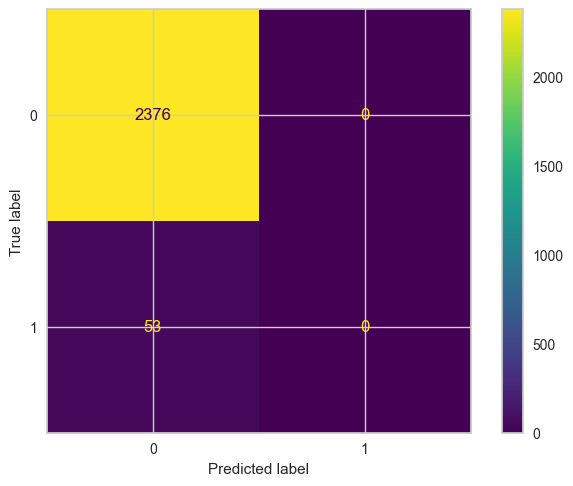

In [15]:
model = svm.SVC().fit(X_train_tfid.toarray(), y_train_tfid)
pred = model.predict(X_test_tfid.toarray())

plot_confusion_matrix(model, X_test_tfid.toarray(), y_test_tfid)
plt.show()

In [16]:
print('F1 score '+str(f1_score(y_test_tfid, pred)))
print('recall '+str(recall_score(y_test_tfid, pred)))
print('precisao '+str(precision_score(y_test_tfid, pred)))
print('acuracia '+str(accuracy_score(y_test_tfid, pred)))

F1 score 0.0
recall 0.0
precisao 0.0
acuracia 0.9781803211198024


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Realize um comparativo entre os métodos LDA, SVD e NMF para realizar modelagem de tópicos. Para cada método:
a) empiricamente, tente identificar uma quantidade de tópicos adequada para seu problema. Exiba resultados que justifiquem a quantidade de tópicos escolhida;
b) identifique as 5 palavras mais relevantes de cada tópico;
c) identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você pode representar os tópicos por suas 5 palavras mais relevantes).
d) qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.

In [38]:
n = 5
docs = data['text'][:5]
lda = LatentDirichletAllocation(n_components=n)
svd = TruncatedSVD(n_components=n)
model = NMF(n_components=n)
lda.fit(x_tfid_vectorizer)
svd.fit(x_tfid_vectorizer)
model.fit(x_tfid_vectorizer)

print('LDA')
for i in range(n):
    print(str(i)+' '+str([tfid_vectorizer.get_feature_names()[j] for j in lda.components_[i].argsort()[:-5:-1]]))


res = lda.fit_transform(tfid_vectorizer.fit_transform(docs))
for i, doc in enumerate(docs):
    print(doc)
    print(res[i])
    print('\n')

LDA


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: list index out of range

In [24]:
print('SVD')
for i in range(n):
    print(str(i)+' '+str([tfid_vectorizer.get_feature_names()[j] for j in svd.components_[i].argsort()[:-5:-1]]))


res = svd.fit_transform(tfid_vectorizer.fit_transform(docs))

for i, doc in enumerate(docs):
    print(doc)
    print(res[i])
    print('\n')

SVD
0 ['the', 'of', 'to', 'about']
1 ['our', 'msbuild', 'wrenching', 'wow']
2 ['work', 'almost', 'anything', 'it']
3 ['on', 'that', 'how', 'involves']
4 ['and', 'for', 'people', 'same']
  which leads me to say why are you using C to do X?  Because they know C it s fast and it has lots of libs available. They might also dislike Java or CL. Not every engineering decision is perfect lots of factors play in.   Attempts to combine the best of C (speed) with the best of scripting languages (easy to do things fast without having to pay attention to what you are doing) in my opinion end up merely joining the worst of both worlds rather than the best of both worlds.  The  pay attention  things is to needless complexity (memory management etc). They only reason we put up with those things was to get speed. If we can get adequate speed without those nobody cares about them.   Besides isn t programming about being specific? Do you really want to code stuff without having to worry about the details

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
print('NMF')
for i in range(n):
    print(str(i)+' '+str([tfid_vectorizer.get_feature_names()[j] for j in model.components_[i].argsort()[:-5:-1]]))


res = model.fit_transform(tfid_vectorizer.fit_transform(docs))
for i, doc in enumerate(docs):
    print(doc)
    print(res[0][i])
    print('\n')

NMF


IndexError: list index out of range

4. Realize um agrupamento dos dados usando a representação do CountVectorizer, seguindo os seguintes passos:

a) Aplique o algoritmo PCA, preservando 95% da variância nos dados. Qual a dimensão resultante dos dados projetados?

In [1]:
pca = PCA(n_components=0.95).fit_transform(x_count_vectorizer.toarray())
pca.shape[1]

NameError: name 'PCA' is not defined

b) Aplique um algoritmo k-means nos dados projetados, tentando usar o método elbow para encontrar o valor de k ́otimo.

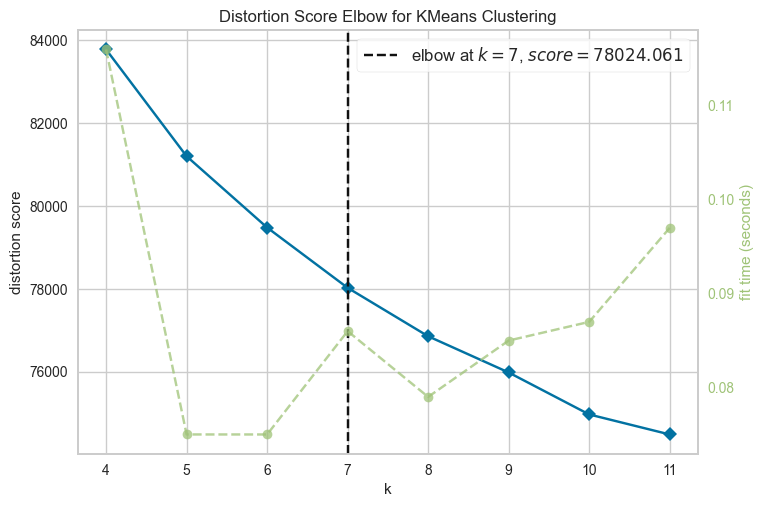

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(pca)
visualizer.show()

5. Nesta questão você deve aplicar métodos de projeção multidimensional para visualizar os dados da segunda questão no espaço visual.

a) aplique os métodos de projeção multidimensional t-SNE e UMAP na representação CountVectorizer e plote os gráfico das projeções resultantes, colorindo os pontos de acordo com os grupos obtidos pelo k-means (questão 4b).